In [7]:
# Load necessary libraries
library(dplyr)
library(ggplot2)

# Step 1: Create a clean data frame
fruits <- data.frame(
  fruit = c("apple", "orange", "banana", "apple", "orange", "banana", "apple"),
  quantity = c(5, 10, 8, 12, 6, 7, 9),
  price = c(3, 2, 4, 3, 2, 4, 3),
  fresh = c(TRUE, TRUE, FALSE, TRUE, TRUE, FALSE, TRUE)
)

# Check the data
print(fruits)
str(fruits)


   fruit quantity price fresh
1  apple        5     3  TRUE
2 orange       10     2  TRUE
3 banana        8     4 FALSE
4  apple       12     3  TRUE
5 orange        6     2  TRUE
6 banana        7     4 FALSE
7  apple        9     3  TRUE
'data.frame':	7 obs. of  4 variables:
 $ fruit   : chr  "apple" "orange" "banana" "apple" ...
 $ quantity: num  5 10 8 12 6 7 9
 $ price   : num  3 2 4 3 2 4 3
 $ fresh   : logi  TRUE TRUE FALSE TRUE TRUE FALSE ...


In [8]:
fruits_summary <- fruits %>%
  group_by(fruit) %>%         # group by the fruit column
  summarise(
    total_quantity = sum(quantity),
    avg_quantity = mean(quantity),
    avg_price = mean(price),
    fresh_count = sum(fresh),
    .groups = "drop"
  )

print(fruits_summary)


# A tibble: 3 × 5
  fruit  total_quantity avg_quantity avg_price fresh_count
  <chr>           <dbl>        <dbl>     <dbl>       <int>
1 apple              26         8.67         3           3
2 banana             15         7.5          4           0
3 orange             16         8            2           2


In [9]:
calc_revenue <- function(quantity, price) {
  return(quantity * price)
}

fruits <- fruits %>%
  mutate(revenue = calc_revenue(quantity, price))

print(fruits)


   fruit quantity price fresh revenue
1  apple        5     3  TRUE      15
2 orange       10     2  TRUE      20
3 banana        8     4 FALSE      32
4  apple       12     3  TRUE      36
5 orange        6     2  TRUE      12
6 banana        7     4 FALSE      28
7  apple        9     3  TRUE      27


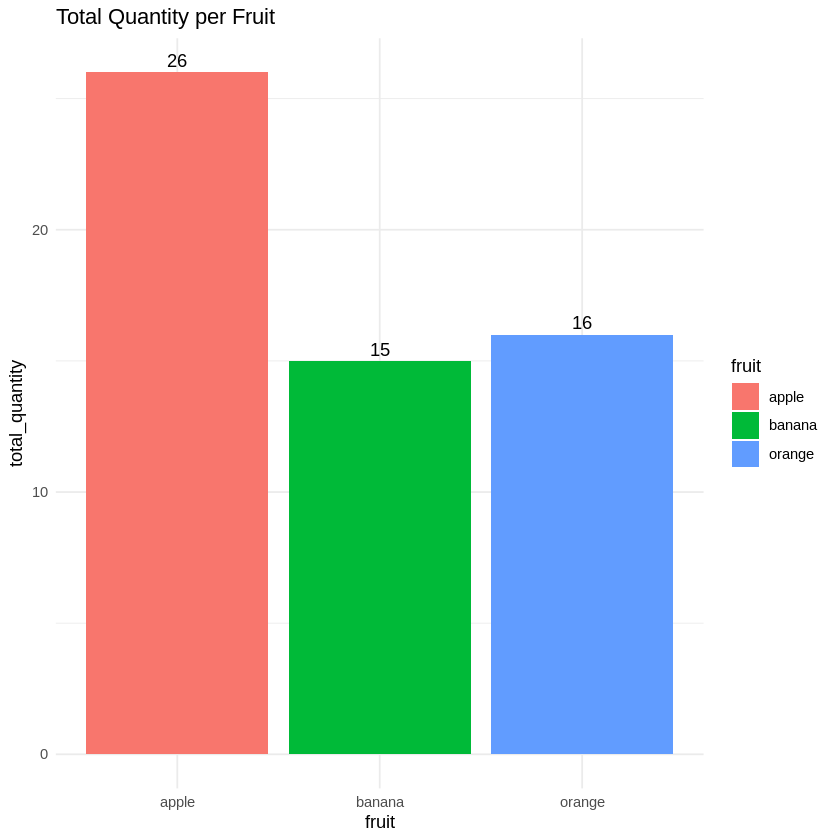

In [10]:
ggplot(fruits_summary, aes(x = fruit, y = total_quantity, fill = fruit)) +
  geom_col() +
  geom_text(aes(label = total_quantity), vjust = -0.4) +
  labs(title = "Total Quantity per Fruit") +
  theme_minimal()


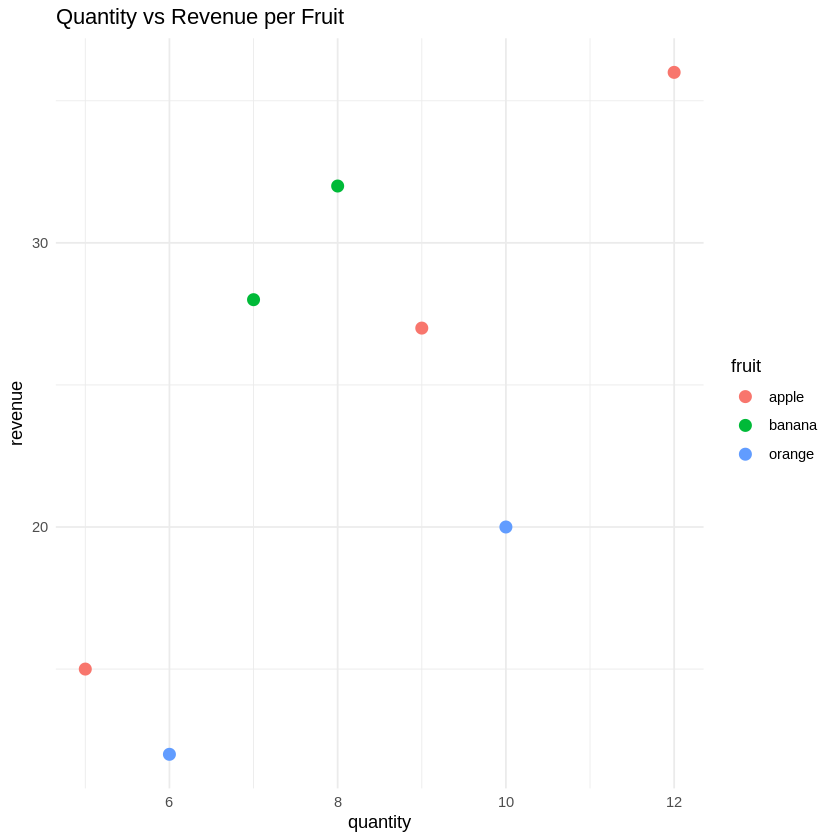

In [11]:
ggplot(fruits, aes(x = quantity, y = revenue, color = fruit)) +
  geom_point(size = 3) +
  labs(title = "Quantity vs Revenue per Fruit") +
  theme_minimal()


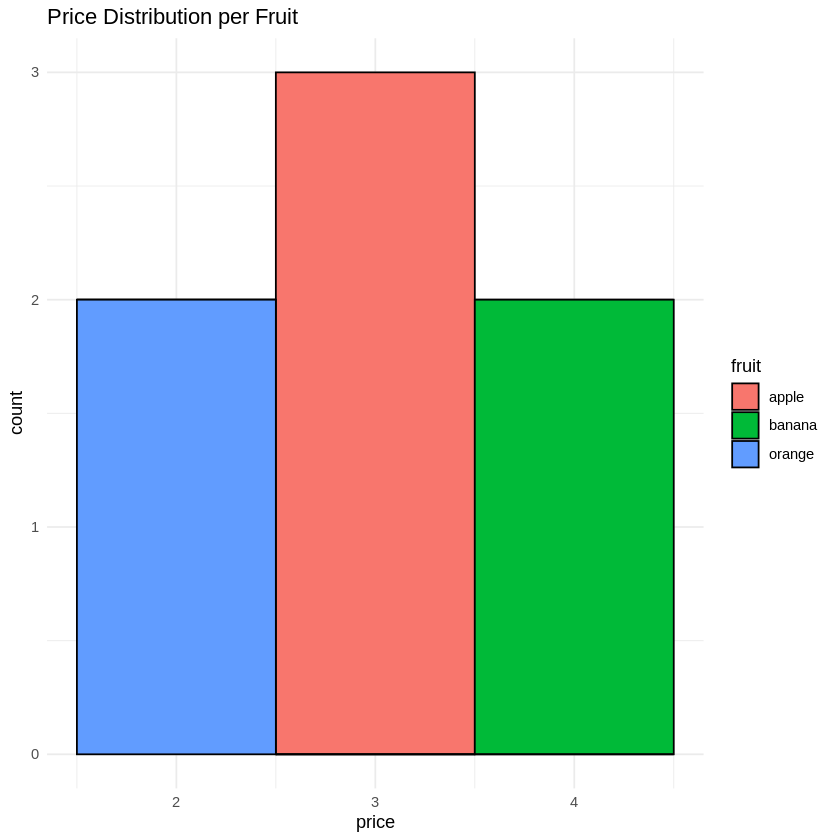

In [12]:
ggplot(fruits, aes(x = price, fill = fruit)) +
  geom_histogram(binwidth = 1, color = "black") +
  labs(title = "Price Distribution per Fruit") +
  theme_minimal()


In [13]:
# Make fruit a factor
fruits$fruit <- factor(fruits$fruit, levels = c("apple", "banana", "orange"))

# Fresh vs total count
summary_fresh <- fruits %>%
  group_by(fruit) %>%
  summarise(fresh_count = sum(fresh), total_count = n(), .groups = "drop")

print(summary_fresh)


# A tibble: 3 × 3
  fruit  fresh_count total_count
  <fct>        <int>       <int>
1 apple            3           3
2 banana           0           2
3 orange           2           2
